# PCA (Principal Component Analysis)
> 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식 
- 입력 데이터 세트의 공분산 행렬 생성
- 공분산 행렬의 고유벡터와 고유값을 계산
- 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출
- 고유값이 가장 큰순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환-> Feature Extraction


## sklearn.decomposition.PCA
> class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)


**Parameters**:

**n_components** : int, float or ‘mle’, default=None
- PCA 축의 개수 즉, 변환 차원

Number of components to keep. if n_components is not set all components are kept:

n_components == min(n_samples, n_features)

If  `n_components  ==  'mle'`  and  `svd_solver  ==  'full'`, Minka’s MLE is used to guess the dimension. Use of  `n_components  ==  'mle'`  will interpret  `svd_solver  ==  'auto'`  as  `svd_solver  ==  'full'`.

If  `0  <  n_components  <  1`  and  `svd_solver  ==  'full'`, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

If  `svd_solver  ==  'arpack'`, the number of components must be strictly less than the minimum of n_features and n_samples.

Hence, the None case results in:

n_components == min(n_samples, n_features) - 1

**copy** : bool, default=True

If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.

**whiten** : bool, default=False

When True (False by default) the  `components_`  vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

**svd_solver** : {‘auto’, ‘full’, ‘arpack’, ‘randomized’}, default=’auto’

If auto :

The solver is selected by a default policy based on  `X.shape`  and  `n_components`: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.

If full :

run exact full SVD calling the standard LAPACK solver via  `scipy.linalg.svd`  and select the components by postprocessing

If arpack :

run SVD truncated to n_components calling ARPACK solver via  `scipy.sparse.linalg.svds`. It requires strictly 0 < n_components < min(X.shape)

If randomized :

run randomized SVD by the method of Halko et al.

**tol** : float, default=0.0

Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity).

**iterated_power** : int or ‘auto’, default=’auto’

Number of iterations for the power method computed by svd_solver == ‘randomized’. Must be of range [0, infinity).

**n_oversamples** : int, default=10

This parameter is only relevant when  `svd_solver="randomized"`. It corresponds to the additional number of random vectors to sample the range of  `X`  so as to ensure proper conditioning. See  [`randomized_svd`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd "sklearn.utils.extmath.randomized_svd")  for more details.

**power_iteration_normalizer** : {‘auto’, ‘QR’, ‘LU’, ‘none’}, default=’auto’

Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See  [`randomized_svd`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd "sklearn.utils.extmath.randomized_svd")  for more details.

**random_state** : int, RandomState instance or None, default=None

Used when the ‘arpack’ or ‘randomized’ solvers are used. Pass an int for reproducible results across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).



**Attributes**:

**components_** : ndarray of shape (n_components, n_features)

Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by decreasing  `explained_variance_`.

**explained_variance_** : ndarray of shape (n_components,)

The amount of variance explained by each of the selected components. The variance estimation uses  `n_samples  -  1`  degrees of freedom.

Equal to n_components largest eigenvalues of the covariance matrix of X.

**explained_variance_ratio_** : ndarray of shape (n_components,)
- 개별PCA '컴포넌트'별로 차지하는 변동성 비율

Percentage of variance explained by each of the selected components.

If  `n_components`  is not set then all components are stored and the sum of the ratios is equal to 1.0.

**singular_values_** : ndarray of shape (n_components,)

The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the  `n_components`  variables in the lower-dimensional space.

**mean_** : ndarray of shape (n_features,)

Per-feature empirical mean, estimated from the training set.

Equal to  `X.mean(axis=0)`.

**n_components_** : int

The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.

**n_features_** : int

Number of features in the training data.

**n_samples_** : int

Number of samples in the training data.

**noise_variance_** : float

The estimated noise covariance following the Probabilistic PCA model from Tipping and Bishop 1999. See “Pattern Recognition and Machine Learning” by C. Bishop, 12.2.1 p. 574 or  [http://www.miketipping.com/papers/met-mppca.pdf](http://www.miketipping.com/papers/met-mppca.pdf). It is required to compute the estimated data covariance and score samples.

Equal to the average of (min(n_features, n_samples) - n_components) smallest eigenvalues of the covariance matrix of X.

**n_features_in_** : int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).

**feature_names_in_** : ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

> PCA 적용 전 주의
- 여러 피처들의 값을 연산해야 하므로, 각 피처들 값을 동일한 스케일로 변환해야 
    - 보통, 표준정규분포로 변환 
    

### Practice : Iris Data PCA

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn 내장 데이터 셋 API 호출
iris = load_iris()

# numpy 데이터 셋을 Pandas DF로 변환 
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
import numpy as np

### Try it 
----
- Random Forest Classifier
    - train : test = 8 : 2
    -  1. Feature : 4개 전부 사용
    -  2. Feature : 2개만 골라 사용
    -  3. 새로운 Feature 2개 만들어내서 사용 <- PCA
    -   이후 accuracy로 '평가'


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# RF classifier 1. Feature 4개 사용 

rf_clf = RandomForestClassifier(random_state = 156)

In [25]:
# data split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size= .2, random_state=1)

# RF 학습 및 예측 
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print(f'RF feature 4개 사용 시 정확도 : {accuracy_score(y_test, pred)}')




RF feature 4개 사용 시 정확도 : 0.9666666666666667


In [27]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(irisDF[['sepal_width','petal_width']].values, irisDF.target, test_size=.2, random_state=11)

In [45]:
# RF classifier
   


rcf = RandomForestClassifier(random_state=156)



# 원본 데이터 
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print(scores)
print(np.mean(scores))



[0.98 0.94 0.96]
0.96


In [3]:
# 3. PCA -> Feature Extraction 2개 new feature 

    # 정규화 
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)


In [6]:
iris_scaled.shape

(150, 5)

In [4]:
    # PCA 수행 (n_components = 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit() & transform() 호출하여, PCA 변환데이터 반환 
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

iris_pca

array([[-2.57612023,  0.47449927],
       [-2.41532249, -0.67809197],
       [-2.65933256, -0.34828193],
       [-2.60199054, -0.60330594],
       [-2.68374418,  0.6402204 ],
       [-2.41219305,  1.48486231],
       [-2.72650791,  0.04037433],
       [-2.54754039,  0.21784304],
       [-2.63111739, -1.12151504],
       [-2.50568834, -0.47375311],
       [-2.49309024,  1.03899203],
       [-2.62658449,  0.12690795],
       [-2.53463285, -0.73367377],
       [-2.89043509, -0.96998871],
       [-2.52492662,  1.85524436],
       [-2.57661201,  2.68047277],
       [-2.52724177,  1.47833344],
       [-2.51071301,  0.48379741],
       [-2.26217005,  1.40241037],
       [-2.64311325,  1.12144398],
       [-2.27440347,  0.40624212],
       [-2.52398522,  0.91873733],
       [-3.01440545,  0.44855689],
       [-2.18617043,  0.08328077],
       [-2.54029796,  0.1318046 ],
       [-2.30389499, -0.62854387],
       [-2.38796377,  0.23807154],
       [-2.49345491,  0.52241515],
       [-2.46849629,

In [7]:
# 차원이 2차원으로 변화된것 확인
iris_pca.shape

(150, 2)

In [8]:
# PCA 변환된 데이터의 컬럼명 변경
pca_columns = ['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


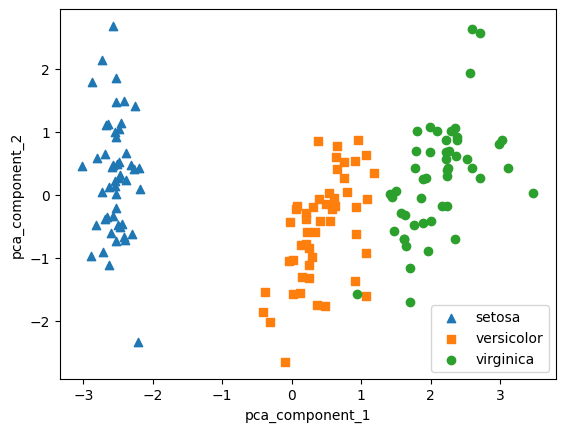

In [9]:
# PCA 차원 축소된 피처들로 데이터 산포도 시각화

# setosa를 세모, versicolor를 네모, virginica를 동그라미
markers = ['^', 's', 'o']

# pca_component_1 -> x축, pca_component_2 -> y축 으로 산포도 
for i, marker in enumerate(markers) :
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
# 각 PCA component 별 변동성 비율 
print(pca.explained_variance_ratio_) # 전체 변동성의 76%가 component1로 설명 가능 

[0.76740358 0.18282727]


### Practice : Credit Card Default Prediction - PCA

In [30]:
df = pd.read_excel('../datasets/credit_card/default of credit card clients (1).xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [32]:
# Preprocessing 

# 컬럼명 변경 
df.rename(columns= {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace=True)

# 속성과 클래스로 데이터 분류 
y_target = df['default']
X_features = df.drop('default', axis=1)

y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [33]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<Axes: >

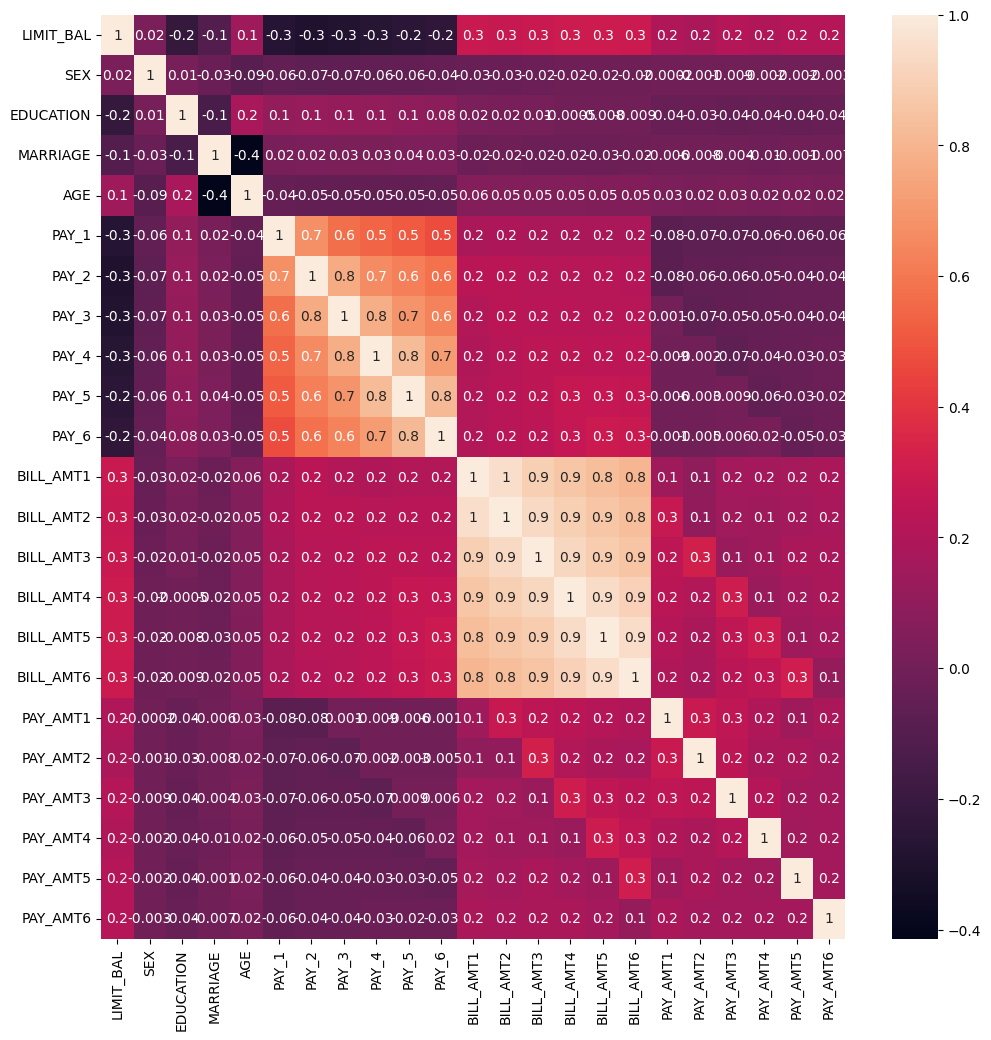

In [35]:
# Heatmap, 피쳐간 상관관계 시각화 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt = '.1g')

# 과거지불금액(PAY_1~6)간  & 과거청구금액(BILL_AMT1~6)간 상관관계 높음 
#   이렇게 상관도가 높은 피처들간에는 PCA 효율이 Good  

In [36]:
# 일부 상관도가 높은 피처들 pca(n_components=2) 변환 후 변동성 확인 

# BILL_AMT1~6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit()호출 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)
# 첫번째 component가 전체 변동성의 90% 설명 -> 효과 Good 

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
# 전체 원본 데이터와 PCA 변환된 데이터간 RF 예측 성능 비교 

# 1. 원본 데이터 
rcf = RandomForestClassifier(n_estimators=300, random_state=156)

# 원본 데이터일 때 RF 예측 성능
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv =3)

print('cv=3인 경우의 개별 Fold세트별 정확도:', scores)
print(f'평균정확도:{np.mean(scores)}')

cv=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균정확도:0.8170333333333333


In [40]:
# 2. PCA 변환된 데이터 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA 변환 후, RF 예측 성능 
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('cv=3인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print(f'PCA 변환 데이터 셋 평균 정확도: {np.mean(scores_pca) : .4f}')

cv=3인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7932 0.7996 0.8029]
PCA 변환 데이터 셋 평균 정확도:  0.7986


# LDA(Lindear Discriminant Analysis)

## sklearn.discriminant_analysis.LinearDiscriminantAnalysis
> class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)



**Documents에서 parameters & attributes 정리필요**

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)

# fit 호출시 target값 입력
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

print(iris_lda.shape)

(150, 2)


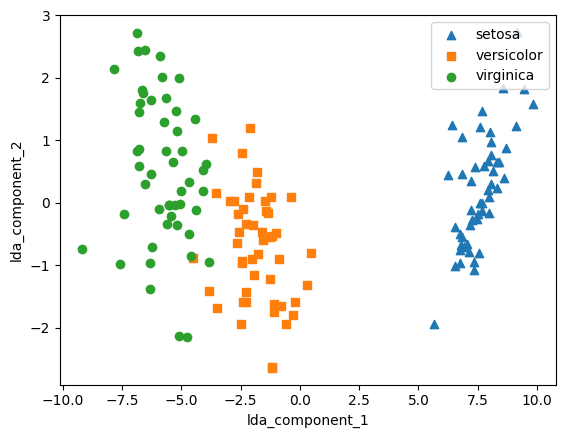

In [48]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor 네모, virginica 동그라미
makers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
    # 각 target 별로 다른 shape으로 scatter plot

for i, marker in enumerate(markers) : 
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label= iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [49]:
print(lda.explained_variance_ratio_) # 첫번째 component가 전체 변동성의 99%를 설명함 

[0.9912126 0.0087874]


### PCA vs LDA 
1. PCA 
    - data의 본질적인 특성(분산)을 잘 유지한 축을 기준으로 차원축소

2. LDA
    - data의 각 클래스 가장 잘 구분하는 축을 기준으로 차원축소 

# SVD (Singular Value Decomposition) 특이값 분해

## ** 정리 필요***

In [51]:
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [52]:
U, Sigma, Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix: \n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [53]:
# Sigma 를 다시 0을 포함한 대칭행렬로 변환

Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [54]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [55]:
# 다시 SVD를 수행하여 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [57]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [58]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬 \n',matrix)
U,Sigma,Vt= svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원:',U.shape,Sigma.shape,Vt.shape)
print('\n Sigma 행렬:', Sigma)

num_components=4
U_tr,Sigma_tr,Vt_tr =svds(matrix,k=num_components)
print("\nTruncated SVD 분해 행렬 차원:",U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\ntruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print("\nTruncated SVD로 분해 후 복원 행렬:\n", matrix_tr)

원본 행렬 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

 Sigma 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

Text(0, 0.5, 'TruncatedSVD Component 2')

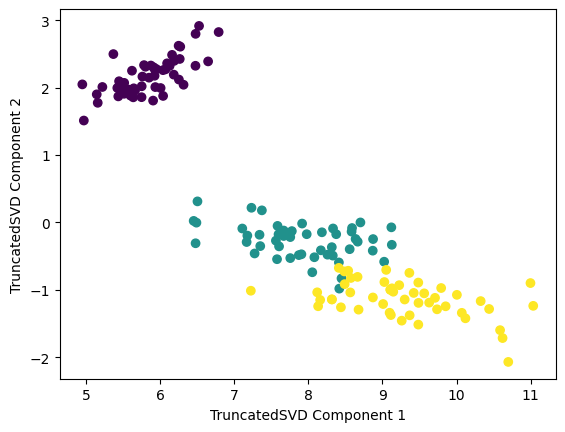

In [59]:
from sklearn.decomposition import TruncatedSVD, PCA


iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터표현, 품종은 색으로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

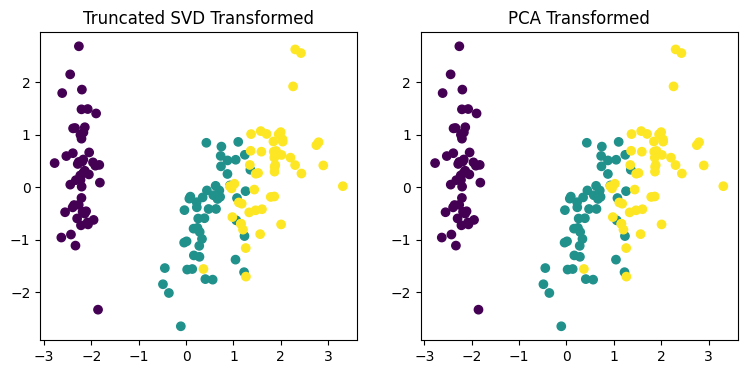

In [61]:
# iris 데이터를 StandardScaler로 변환 
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TrncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현 
flg, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_tsvd[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
